# Jungfrau 16M geometry reconstruction

This notebook contains a few tools to rebuild the 2D images from the raw data, apply the pedestal correciton and so on.

In [1]:
#Check HDF5 plugin works ...
import h5py
import numpy
import bitshuffle.h5

print(h5py.__version__) # >= '2.5.0'

f = h5py.File("filename.h5", "w")

# block_size = 0 let Bitshuffle choose its value
block_size = 0

dataset = f.create_dataset(
    "data",
    (100, 100, 100),
    compression=bitshuffle.h5.H5FILTER,
    compression_opts=(block_size, bitshuffle.h5.H5_COMPRESS_LZ4),
    dtype='float32',
    )

# create some random data
array = numpy.random.rand(100, 100, 100)
array = array.astype('float32')

dataset[:] = array

f.close()


2.9.0.post0


In [2]:
import bitshuffle, os 
print(os.environ.get("HDF5_PLUGIN_PATH"))

import numpy, scipy, pyFAI, h5py, bitshuffle.h5
print(h5py.version.hdf5_version_tuple)
%matplotlib nbagg
from matplotlib.pyplot import subplots

None
(1, 10, 2)


In [42]:
prefix = '/scratch/kieffer/JF16/'
ped_file = prefix + 'pedestal_20190324_0846.JF07T32V01.h5'
gain_file = prefix + 'gains_201810.h5'
img_files = prefix + "lysoembl_32_1153.JF07T32V01.h5"
#%time ref = calc_pedestal(ped_file, 0 , 100)
with h5py.File(gain_file, "r") as h:
    gain = h["gains"][...]

In [4]:
gains = gain.astype("float32")
print(gain[0])
print(gain[1])

[[42.20000076 42.20000076 42.36162567 ... 40.49427795 40.55762482
  40.33831787]
 [42.20184708 42.15740585 42.80419159 ... 40.62117767 39.87102127
  40.61871338]
 [42.23724747 42.45800781 42.09789276 ... 40.28950119 40.78246689
  40.96500015]
 ...
 [40.81444168 40.93740845 41.11075974 ... 40.85427475 40.30038452
  40.05840683]
 [41.10281754 41.63383484 41.02978897 ... 41.06227875 41.12207031
  40.50315857]
 [42.20000076 41.3877182  41.42298508 ... 40.43046951 40.06472778
  39.78421402]]
[[-1.42499995 -1.42499995 -1.39686532 ... -1.37109321 -1.37254508
  -1.38444994]
 [-1.41875578 -1.42002005 -1.41433649 ... -1.36555869 -1.37736636
  -1.41221789]
 [-1.41662408 -1.42228047 -1.4124643  ... -1.32779197 -1.40245844
  -1.42515804]
 ...
 [-1.36125355 -1.38601559 -1.39458315 ... -1.36025679 -1.35009144
  -1.35155146]
 [-1.33137309 -1.38245055 -1.38943187 ... -1.36184631 -1.35530838
  -1.34524488]
 [-1.42499995 -1.34156641 -1.3809811  ... -1.34832714 -1.327512
  -1.33679067]]


In [158]:
%%time 
with h5py.File(ped_file, mode="r") as h:
    k = list(h["data"].keys())[0]
    ds = h["data/%s/data"%k][:, 50, 60]

CPU times: user 32 ms, sys: 5.23 ms, total: 37.3 ms
Wall time: 155 ms


(3500,)


<IPython.core.display.Javascript object>


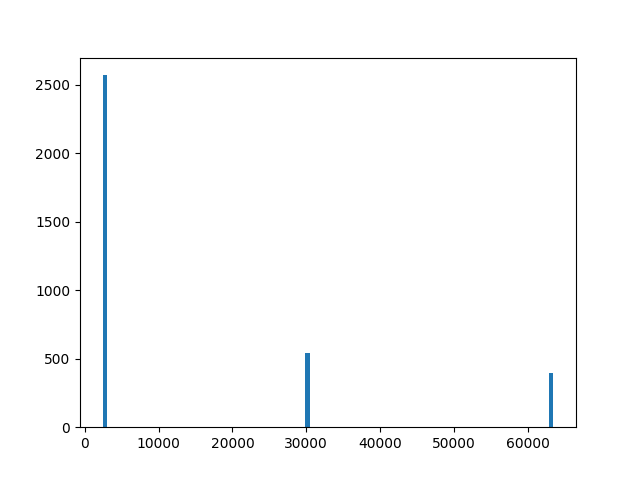

(array([2569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         538.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         393.]),
 array([ 2396.,  3007.,  3618.,  4229.,  4840.,  5451.,  6062.,  6673.,
         7284.,  7895.,  8506.,  9117.,  9728., 10339., 10950., 11561.,
        12172., 12783., 13394., 14005., 14616., 15227., 15

In [159]:
print(ds.shape)
fig,ax = subplots()
ax.hist(ds, 100)

<IPython.core.display.Javascript object>


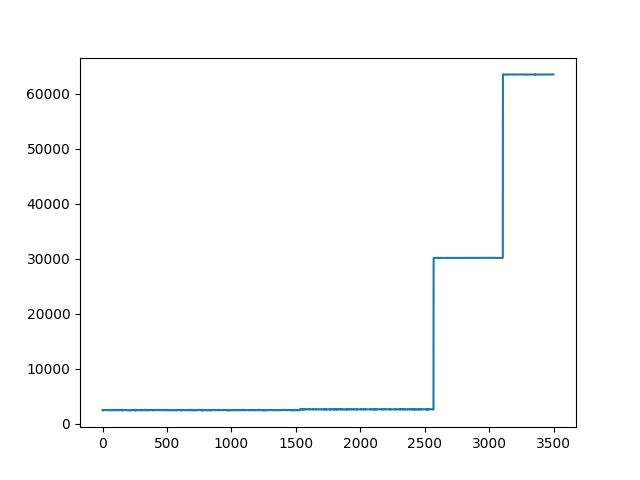

In [160]:
fig,ax = subplots()
ax.plot(ds)

In [161]:
dgain = (ds>>14)
M1 = dgain == 0
M2 = dgain == 1
M3 = dgain == 2
M4 = dgain == 3

In [162]:
print(M1.sum(),M2.sum(),M3.sum(), M4.sum())

2569 538 0 393


<IPython.core.display.Javascript object>


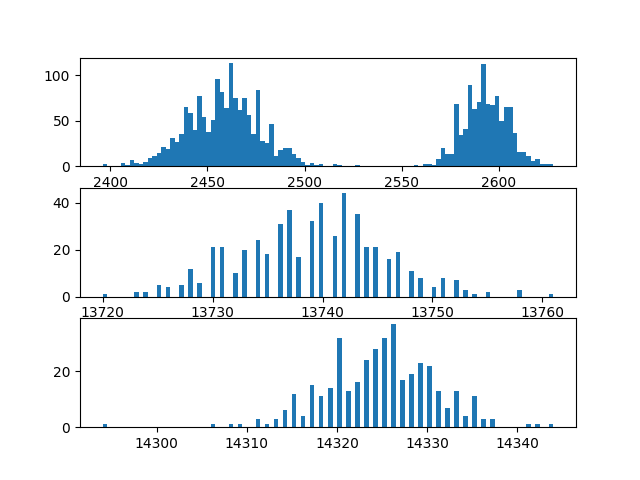

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  3.,
         0.,  6.,  0., 12.,  0.,  4.,  0., 15.,  0., 11.,  0., 14.,  0.,
        32.,  0., 13.,  0., 16.,  0., 24.,  0., 28.,  0., 32.,  0., 37.,
         0., 17.,  0., 19.,  0., 23.,  0., 22.,  0., 13.,  0.,  7.,  0.,
        13.,  0.,  4.,  0., 11.,  0.,  3.,  0.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([14294. , 14294.5, 14295. , 14295.5, 14296. , 14296.5, 14297. ,
        14297.5, 14298. , 14298.5, 14299. , 14299.5, 14300. , 14300.5,
        14301. , 14301.5, 14302. , 14302.5, 14303. , 14303.5, 14304. ,
        14304.5, 14305. , 14305.5, 14306. , 14306.5, 14307. , 14307.5,
        14308. , 14308.5, 14309. , 14309.5, 14310. , 14310.5, 14311. ,
        14311.5, 14312. , 14312.5, 14313. , 14313.5, 14314. , 14314.5,
        

In [163]:
fig,ax = subplots(3)
ax[0].hist(ds[M1], 100)
ax[1].hist(ds[M2]&((1<<14)-1), 100)
ax[2].hist(ds[M4]&((1<<14)-1), 100)

In [11]:
def plot_distrib(fn, pix0=0, pix1=0):
    with h5py.File(fn, "r") as h:
        k = list(h["data"].keys())[0]
        ds = h["data/%s/data"%k][slice(None),pix0, pix1]
    dgain = (ds>>14)
    M1 = dgain == 0
    M2 = dgain == 1
    M4 = dgain == 3
    fig,ax = subplots(3)
    ax[0].hist(ds[M1], 100)
    ax[1].hist(ds[M2]&((1<<14)-1), 100)
    ax[2].hist(ds[M4]&((1<<14)-1), 100)
    return ax

<IPython.core.display.Javascript object>


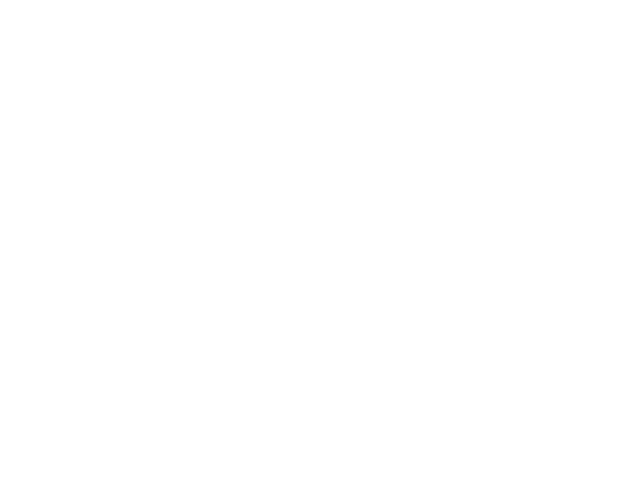

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0baf6de3c8>,
      dtype=object)

In [12]:
plot_distrib(ped_file, 10, 100)

<IPython.core.display.Javascript object>


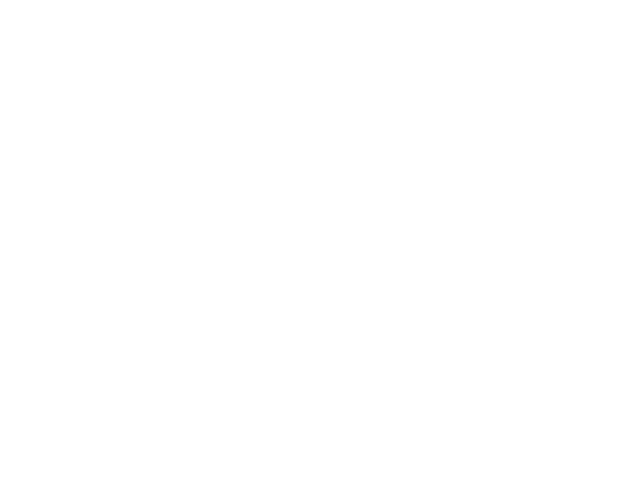

In [13]:
fig,ax = subplots()
ax.plot(numpy.arcsinh(ds))

In [14]:
%load_ext Cython

In [15]:
%%cython --compile-args=-fopenmp --link-args=-fopenmp

import cython
import h5py
import numpy
cimport numpy as cnumpy
from cython.parallel import prange

cdef class StatAccumulator:
    cdef:
        readonly int bits
        readonly int frames
        readonly int height
        readonly int width
        readonly cnumpy.uint32_t[:, :, ::1] count # gain is first index
        readonly cnumpy.float64_t[:, :,::1] sum, M2 
    def __cinit__(self, shape, int bits=14):
        self.bits = bits
        ngains = 1<<(16-bits)
        self.frames = 0
        self.height = shape[0]
        self.width = shape[-1]
        self.count = numpy.zeros([ngains, self.height, self.width], dtype=numpy.uint32)
        self.sum = numpy.zeros([ngains, self.height, self.width], dtype=numpy.float64)
        self.M2 = numpy.zeros([ngains, self.height, self.width], dtype=numpy.float64)
        
    def __deallocate(self):
        self.count = None
        self.summ = None
        self.M2 = None
    
    @cython.wraparound(False)
    @cython.boundscheck(False)
    @cython.initializedcheck(False)
    @cython.cdivision(True)
    def feed(self, cnumpy.uint16_t[:, ::1] frame):
        cdef:
            int gain, i, j, mask
            int value, trimmed, cnt
            double to_store, sm, delta
        
        mask = (1<<self.bits) -1
        self.frames += 1 
        for i in prange(self.height, nogil=True):
            for j in range(self.width):
                
                value = frame[i,j]
                gain = value>>self.bits
                trimmed = value & mask
                to_store = <double> trimmed
                cnt = self.count[gain, i, j] + 1 
                self.count[gain, i, j] = cnt
                sm = self.sum[gain, i, j] + to_store
                self.sum[gain, i, j] = sm 
                delta = (sm/cnt)-to_store
                self.M2[gain, i, j] = self.M2[gain, i, j] + delta*delta*(cnt-1)/cnt
                
    def stats(self):
        mean = numpy.asarray(self.sum)/numpy.asarray(self.count)
        std = numpy.sqrt(numpy.asarray(self.M2)/(numpy.asarray(self.count)-1))
        return mean, std

@cython.wraparound(False)
@cython.boundscheck(False)
@cython.initializedcheck(False)
@cython.cdivision(True)
def correct_frame(cnumpy.uint16_t[:,::1] raw, 
                  cython.floating[:, :,::1] gain, 
                  cython.floating[:, :,::1] pedestal):
    cdef:
        int n, m, g, i, j, value, mask, nbits=14
        cnumpy.float32_t[:, ::1] result
        cython.floating gain_value
    m = raw.shape[0]
    n = raw.shape[1]
    mask = (1<<nbits)-1
    result = numpy.empty((m,n), dtype=numpy.float32)
    for i in range(m):#, nogil=True):
        for j in range(n):
            value = raw[i, j]
            g = value >> nbits
            if g == 3:
                g = 2
            gain_value = gain[g, i, j]
            result[i, j] = ((value&mask) - pedestal[g, i, j]) / gain_value if gain_value else 0.0
    return numpy.asarray(result)

In [16]:
def stat_stack(filename, start=0, stop=-1):
    "A tool to perform some statistics analysis on a bunch of frames"
    with h5py.File(filename, mode="r") as h:
        k = list(h["data"].keys())[0]
        ds = h["data/%s/data"%k]
        acc = StatAccumulator(ds.shape[-2:])
        if stop == -1:
            stop = ds.shape[-1]
        for i in range(start, stop):
            acc.feed(ds[i])
    return acc.stats()

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 4min 47s, sys: 18.9 s, total: 5min 6s
Wall time: 1min 7s


<IPython.core.display.Javascript object>


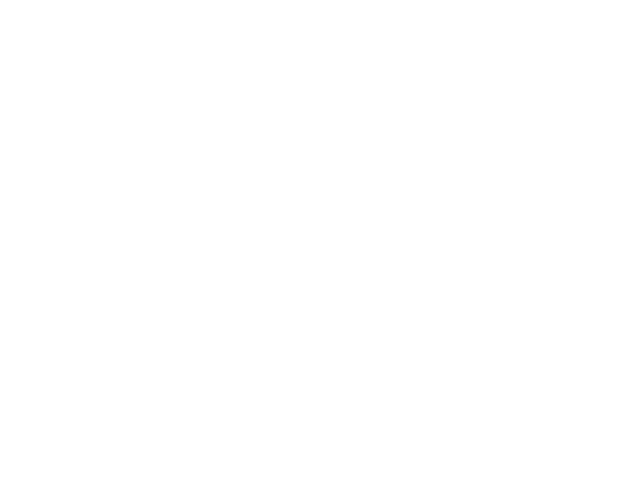

19.735823769500087

In [17]:
%time slices1k = stat_stack(ped_file, 0, 1500)
fig, ax = subplots()
ax.imshow(slices1k[1][0].reshape(-1, 4096))
numpy.nanmean(slices1k[1][0])

In [18]:
%time slices2k = stat_stack(ped_file, 2000, 2500)

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 1min 39s, sys: 6.9 s, total: 1min 46s
Wall time: 22.6 s


<IPython.core.display.Javascript object>


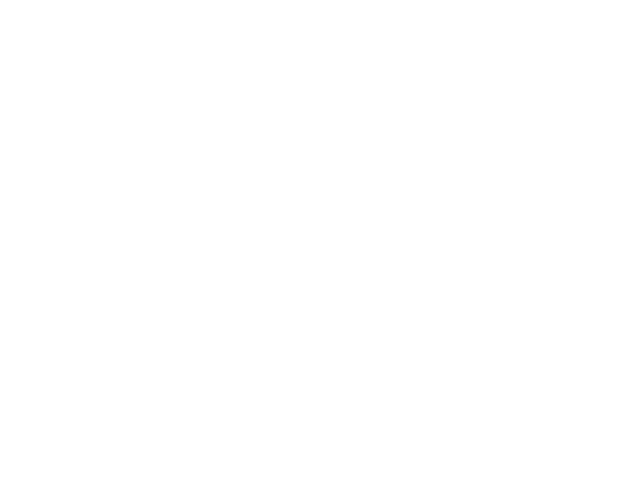

2544.2862576054904

In [19]:
fig, ax = subplots()
ax.imshow(slices2k[0][0].reshape(-1, 4096))
numpy.nanmean(slices2k[0][0])

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 1min 41s, sys: 9.71 s, total: 1min 51s
Wall time: 30.2 s


<IPython.core.display.Javascript object>


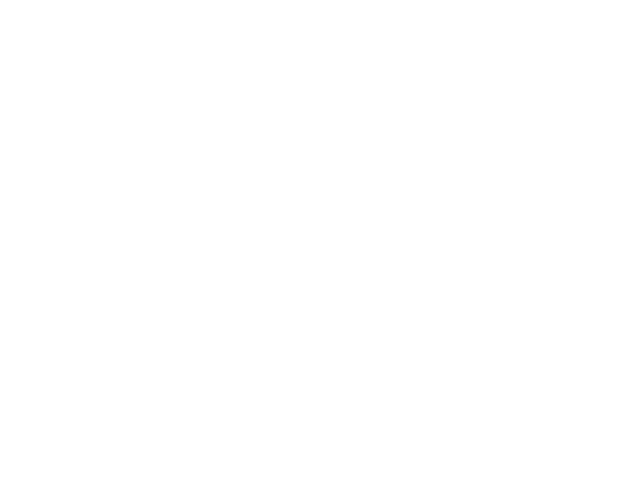

6.7765221608999235

In [20]:
%time slices3k = stat_stack(ped_file, 2600, 3000)
fig, ax = subplots()
ax.imshow(slices3k[1][1].reshape(-1, 4096))
numpy.nanmean(slices3k[1][1])

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 1min 24s, sys: 8.56 s, total: 1min 32s
Wall time: 18.9 s


<IPython.core.display.Javascript object>


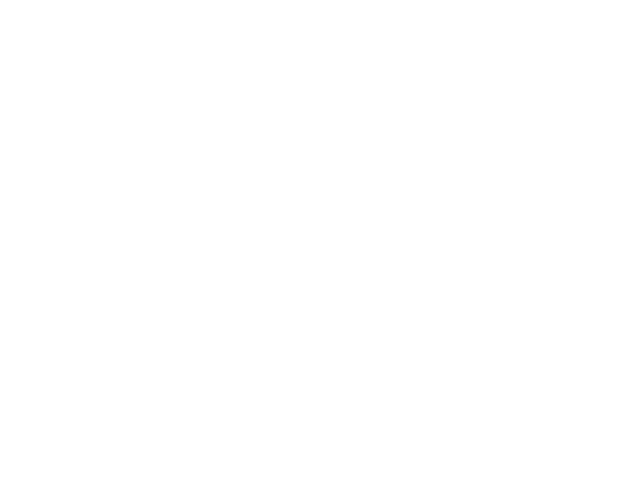

8.836223371290236

In [21]:
%time slices4k = stat_stack(ped_file, 3110, 3500)
fig, ax = subplots()
ax.imshow(slices4k[1][3].reshape(-1, 4096))
numpy.nanmean(slices4k[1][3])

In [22]:
slices4k[0].shape

(4, 16384, 1024)

<IPython.core.display.Javascript object>


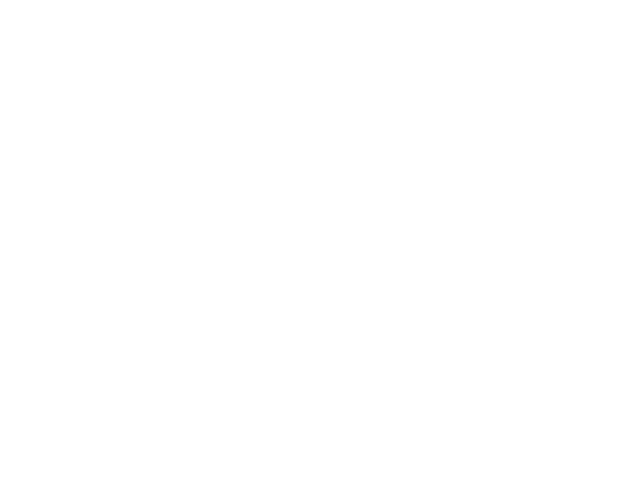

In [23]:
fig, ax = subplots(2,2)
for i,a in enumerate(ax.flat):
    a.imshow(slices4k[0][i].reshape(-1, 4096))
    a.set_title("Mean channel %i"%i)
    

In [24]:
%%time 
pedestal_mean = numpy.zeros_like(slices4k[0])
pedestal_mean[0] = slices2k[0][0]
pedestal_mean[1] = slices3k[0][1]
pedestal_mean[2] = slices4k[0][3]

pedestal_std = numpy.zeros_like(slices4k[1])
pedestal_std[0] = slices2k[1][0]
pedestal_std[1] = slices3k[1][1]
pedestal_std[2] = slices4k[1][3]


with h5py.File(prefix+"pedestal_20190324_avg_bs.h5", "w") as f:
    f.create_dataset("mean",
                pedestal_mean.shape,
                compression=bitshuffle.h5.H5FILTER,
                compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                dtype='float32',
                data=pedestal_mean
                )
    f.create_dataset("std",
                pedestal_std.shape,
                compression=bitshuffle.h5.H5FILTER,
                compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                dtype='float32',
                data=pedestal_std
                )
    f.create_dataset("gain",
                gain.shape,
                compression=bitshuffle.h5.H5FILTER,
                compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                dtype='float32',
                data=gain
                )
    

CPU times: user 4min 42s, sys: 1.51 s, total: 4min 44s
Wall time: 27.6 s


In [25]:
from numba import jit
            
@jit(nopython=True, nogil=True, cache=True)
def do_corrections(m, n, image, G, P, pede_mask, mask, mask2):
    gain_mask = np.bitwise_and(np.right_shift(image, 14), mask2)
    data = np.bitwise_and(image, mask)
    res = np.empty((m, n), dtype=np.float32)
    

    for i in range(m):
        for j in range(n):
            if pede_mask[i][j] != 0:
                res[i][j] = 0
                continue
            gm = gain_mask[i][j]
            if gm == 3:
                gm = 2
            res[i][j] = (data[i][j] - P[gm][i][j]) / G[gm][i][j]

    return res


In [26]:
with h5py.File(prefix+"pedestal_20190324_avg_bs.h5", "r") as h:
    pedestal_mean = h["mean"][...]
    pedestal_std = h["std"][...]
    pedestal_gain = h["gain"][...]
with h5py.File(img_files, "r") as f:
    k = list(f["data"].keys())[0]
    raw = f["data/%s/data"%k][...]
print(raw.shape)

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/bitshuffle/plugin
(432, 16384, 1024)


In [27]:
#ls /mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/bitshuffle/plugin

In [28]:
#%load_ext Cython

In [29]:
print(raw.shape)
print(gain.shape)
print(pedestal_mean.shape)
%timeit correct_frame(raw[0], gain, pedestal_mean)

(432, 16384, 1024)
(4, 16384, 1024)
(4, 16384, 1024)
90.4 ms ± 723 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%matplotlib nbagg
from matplotlib.pylab import subplots
import numpy

In [31]:
fig, ax = subplots()
img  = correct_frame(raw[250], gain, pedestal_mean)
ax.imshow(img.reshape(-1, 4096).clip(0,100))

<IPython.core.display.Javascript object>

In [33]:

import bitshuffle.h5
with h5py.File("/scratch/kieffer/JF16/lysoembl_32_1153_intensity_corrected_bs.h5", "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.float32)
    print(ds.shape)
    print(ds.dtype)
    for idx, frame in enumerate(raw):
        ds[idx] = correct_frame(frame, gain, pedestal_mean)


(432, 16384, 1024)
float32


In [86]:
#Pedastal calculation using the GPU !

import pyopencl
from pyopencl import array as cla
ctx = pyopencl.create_some_context(interactive=True)
queue = pyopencl.CommandQueue(ctx)
shape = 16*1024,1024
frame_d = cla.empty(queue, shape[-2:], dtype="uint16")
corrected_d = cla.empty(queue, shape[-2:], dtype="float32")
icorrected_d = cla.empty(queue, shape[-2:], dtype="uint32")
pedestal_d = cla.to_device(queue, pedestal_mean.astype("float32"))
error_d = cla.to_device(queue, pedestal_std.astype("float32"))
gains_d = cla.to_device(queue, gain.astype("float32"))

bits = 14
ngains = 1<<(16-bits)
print((ngains, shape[-2], shape[-1]))
count_d = cla.empty(queue, (ngains, shape[-2], shape[-1]), dtype="uint32")
sum_d = cla.empty(queue, (ngains, shape[-2], shape[-1]), dtype="float32")
M2_d = cla.empty(queue, (ngains, shape[-2], shape[-1]), dtype="float32")

%load_ext pyopencl.ipython_ext

ctx

Choose platform:
[0] <pyopencl.Platform 'NVIDIA CUDA' at 0x561462be7600>
[1] <pyopencl.Platform 'Intel(R) OpenCL' at 0x561462a6a930>
[2] <pyopencl.Platform 'AMD Accelerated Parallel Processing' at 0x7f0b4622da18>
Choice [0]:0
Set the environment variable PYOPENCL_CTX='0' to avoid being asked again.
(4, 16384, 1024)
The pyopencl.ipython_ext extension is already loaded. To reload it, use:
  %reload_ext pyopencl.ipython_ext


<pyopencl.Context at 0x561461a368f0 on <pyopencl.Device 'GeForce GTX 1080 Ti' on 'NVIDIA CUDA' at 0x561462431c00>>

In [87]:
frame_d.dtype, corrected_d.dtype, pedestal_d.dtype, error_d.dtype, gains_d.dtype

(dtype('uint16'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'))

In [88]:
%%cl_kernel

#define BITS_MANTISSA_FLOAT 23

inline float truncate_precision32(float value, 
                                  uchar prec_bits) 
{
    union{ float f; uint u;} work;
    work.f = value;
    if (prec_bits < BITS_MANTISSA_FLOAT)
    {
        int zeroed_bits = BITS_MANTISSA_FLOAT - prec_bits;
        uint mask = ~((1 << zeroed_bits) - 1);
        work.u &= mask;
    }
    return work.f;
}

inline float  correct_pedestal(global ushort *raw,
                               global float *gain,
                               global float *pedestal,
                               uint size)
{
    uint idx = get_global_id(0);
    float result = 0.0f;
    if (idx<size)
    {

        uint idx = get_global_id(0);
        uint value = raw[idx];
        uint g = value >>14;
        value &= (1<<14)-1;
        g = (g==3)?2:g;
        uint read_at = g*size + idx;
        float gain_value = gain[read_at];
        if (gain_value!=0.0f)
            result = (value - pedestal[read_at]) / gain_value;
    }
    return result;
}
inline float  correct_pedestal_cutoff(global ushort *raw,
                                      global float *gain,
                                      global float *pedestal,
                                      global float *error,
                                      uint size,
                                      uint nsigma)
{
    uint idx = get_global_id(0);
    float result = 0.0f;
    if (idx<size)
    {

        uint idx = get_global_id(0);
        uint value = raw[idx];
        uint g = value >>14;
        value &= (1<<14)-1;
        g = (g==3)?2:g;
        uint read_at = g*size + idx;
        result = value - pedestal[read_at];
        if (g==0 && result<nsigma*error[read_at])
        {
            result = 0.0f;
        }
        else
        {
            float gain_value = gain[read_at];
            if (gain_value!=0.0f)
            {
                result = (value - pedestal[read_at]) / gain_value;
            }
        }
    }
    return result;
}


kernel void ocl_pedestal_simple( global ushort *raw,
                                 global float *gain,
                                 global float *pedestal,
                                 global float *result,
                                 uint size)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        result[idx] = correct_pedestal(raw, gain, pedestal, size);
    }
}

kernel void ocl_pedestal_crop14( global ushort *raw,
                                 global float *gain,
                                 global float *pedestal,
                                 global float *result,
                                 uint size)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        result[idx] = truncate_precision32(correct_pedestal(raw, gain, pedestal, size), 14);
    }
}

kernel void ocl_pedestal_cutoff( global ushort *raw,
                                 global float *gain,
                                 global float *pedestal,
                                 global float *error,
                                 global float *result,
                                 uint size,
                                 uint nsigma)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        result[idx] = truncate_precision32(correct_pedestal_cutoff(raw, gain, pedestal, error, size, nsigma), 14);
    }
}

kernel void ocl_pedestal_cutoff_int( global ushort *raw,
                                 global float *gain,
                                 global float *pedestal,
                                 global float *error,
                                 global uint *result,
                                 uint size,
                                 uint nsigma)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        result[idx] = (uint) correct_pedestal_cutoff(raw, gain, pedestal, error, size, nsigma);
    }
}

In [76]:
%%time 
with h5py.File(prefix + "lysoembl_32_1153_intensity_corrected_bs_gpu.h5", "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.float32)
    print(ds.shape)
    print(ds.dtype)
    for idx, frame in enumerate(raw):
        frame_d.set(frame)
        ocl_pedestal_simple(queue, (frame.size,), (1024,), 
                            frame_d.data,
                            gains_d.data,
                            pedestal_d.data,
                            corrected_d.data,
                            numpy.uint32(frame.size))
        ds[idx] = corrected_d.get()


(432, 16384, 1024)
float32
CPU times: user 11min 25s, sys: 1min 17s, total: 12min 42s
Wall time: 2min 27s


In [77]:
%%time 
with h5py.File(prefix+"/lysoembl_32_1153_intensity_corrected_bs_gpu_14b.h5", "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.float32)
    print(ds.shape)
    print(ds.dtype)
    for idx, frame in enumerate(raw):
        frame_d.set(frame)
        ocl_pedestal_crop14(queue, (frame.size,), (1024,), 
                            frame_d.data,
                            gains_d.data,
                            pedestal_d.data,
                            corrected_d.data,
                            numpy.uint32(frame.size))
        ds[idx] = corrected_d.get()

(432, 16384, 1024)
float32
CPU times: user 12min 39s, sys: 1min 1s, total: 13min 40s
Wall time: 2min 29s


In [90]:
%%time 
nsigma=4

with h5py.File(prefix+"/lysoembl_32_1153_intensity_corrected_bs_gpu_%isigma_14b.h5"%nsigma, "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.float32)
    print(ds.shape)
    print(ds.dtype)
    for idx, frame in enumerate(raw):
        frame_d.set(frame)
        ocl_pedestal_cutoff(queue, (frame.size,), (1024,), 
                            frame_d.data,
                            gains_d.data,
                            pedestal_d.data,
                            error_d.data,
                            corrected_d.data,
                            numpy.uint32(frame.size),
                            numpy.uint32(nsigma))
        ds[idx] = corrected_d.get()

(432, 16384, 1024)
float32
CPU times: user 19min 29s, sys: 53 s, total: 20min 22s
Wall time: 3min 18s


In [94]:
%%time 
nsigma=4
with h5py.File(prefix+"/lysoembl_32_1153_intensity_corrected_bs_gpu_%isigma_int.h5"%nsigma, "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.uint32)
    print(ds.shape)
    print(ds.dtype)
    for idx, frame in enumerate(raw):
        frame_d.set(frame)
        ocl_pedestal_cutoff_int(queue, (frame.size,), (1024,), 
                                frame_d.data,
                                gains_d.data,
                                pedestal_d.data,
                                error_d.data,
                                icorrected_d.data,
                                numpy.uint32(frame.size),
                                numpy.uint32(nsigma))
        ds[idx] = icorrected_d.get()

(432, 16384, 1024)
uint32
CPU times: user 49 s, sys: 23.6 s, total: 1min 12s
Wall time: 33.3 s


In [96]:
%%time 
nsigma=4

from scipy.sparse import csr_matrix
nnz = 0
start_at=0
data = []
indices = []
indptr = []
# with h5py.File(prefix+"/lysoembl_32_1153_intensity_corrected_bs_gpu_%isigma_14b.h5"%nsigma, "w") as h5:
#     data_grp = h5.require_group("data")
#     ds = data_grp.require_dataset("data", 
#                                   shape=raw.shape, 
#                                   chunks=(1,)+raw.shape[1:], 
#                                   compression=bitshuffle.h5.H5FILTER,
#                                   compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
#                                   dtype=numpy.float32)
#     print(ds.shape)
#     print(ds.dtype)
for idx, frame in enumerate(raw):
    frame_d.set(frame)
    ocl_pedestal_cutoff(queue, (frame.size,), (1024,), 
                        frame_d.data,
                        gains_d.data,
                        pedestal_d.data,
                        error_d.data,
                        corrected_d.data,
                        numpy.uint32(frame.size),
                        numpy.uint32(nsigma))
    corrected = corrected_d.get()
    csr = csr_matrix(corrected)
    indptr.append(csr.indptr+start_at)
    indices.append(csr.indices)
    data.append(csr.data)
    start_at+=len(csr.indptr)
print(start_at)

7078320
CPU times: user 1min 38s, sys: 25.8 s, total: 2min 3s
Wall time: 2min 3s


In [119]:
indptr2 = [i[1:]-i[0] for i in indptr]
indptr3 = [numpy.arange(1)]
for d in indptr2:
    indptr3.append(d+indptr3[-1][-1]) 
with h5py.File(prefix+"/lysoembl_32_1153_intensity_corrected_bs_sparse_%isigma.h5"%nsigma, "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data",
                                  shape=(sum(i.size for i in data),),
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.float32,
                                  data = numpy.concatenate(data).astype("float32") )
    dis = data_grp.require_dataset("indices",
                                  shape=(sum(i.size for i in indices),),
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.uint16,
                                  data = numpy.concatenate(indices).astype("uint16"))
    dip =      data_grp.require_dataset("indptr",
                                        shape=(sum(i.size for i in indptr3),),
                                        compression=bitshuffle.h5.H5FILTER,
                                        compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                        dtype=numpy.uint32,
                                        data = numpy.concatenate(indptr3).astype("uint32"))


In [121]:
# Bitshuffle the raw data
with h5py.File(prefix+"/lysoembl_32_1153_raw_bs_uint16.h5", "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.int16)
    for idx, frame in enumerate(raw):
        ds[idx] = frame

In [126]:
from silx.opencl.codec.byte_offset import ByteOffset
size = numpy.prod(raw.shape[1:])
bo = ByteOffset(size, size, ctx)
bo.

In [133]:
%%time 
#Compress data to CBF
nsigma = 0
import shutil
dest_dir = prefix+"CBF"
if os.path.exists(dest_dir):
    shutil.rmtree(dest_dir)
os.makedirs(dest_dir)
for idx, frame in enumerate(raw):
    frame_d.set(frame)
    ocl_pedestal_cutoff_int(queue, (frame.size,), (1024,), 
                                frame_d.data,
                                gains_d.data,
                                pedestal_d.data,
                                error_d.data,
                                icorrected_d.data,
                                numpy.uint32(frame.size),
                                numpy.uint32(nsigma))
    with open(dest_dir+"/frame_%04i.cbf"%idx,"wb") as of:
        of.write(bo.encode_to_bytes(icorrected_d.ravel()))

CPU times: user 4.35 s, sys: 6.34 s, total: 10.7 s
Wall time: 10.7 s


<IPython.core.display.Javascript object>


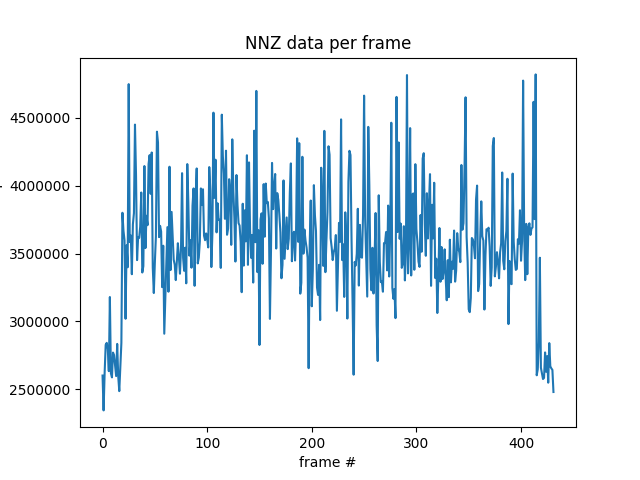

Text(0.5, 1.0, 'NNZ data per frame')

In [139]:
fig, ax = subplots()
ax.plot([len(i) for i in data])
ax.set_xlabel("frame #")
ax.set_ylabel("Number of non-zero pixel")
ax.set_title("NNZ data per frame")

<IPython.core.display.Javascript object>


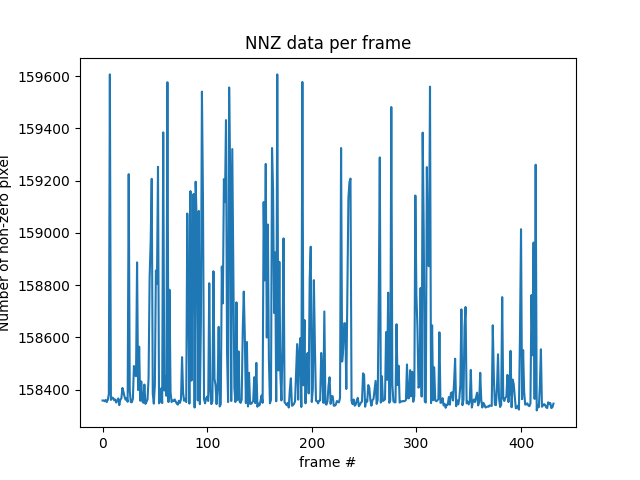

[158358, 158358, 158355, 158360, 158352, 158360, 158382, 159607, 158360, 158369, 158368, 158359, 158362, 158350, 158358, 158366, 158340, 158361, 158366, 158406, 158391, 158373, 158361, 158366, 158353, 159225, 158395, 158352, 158351, 158364, 158490, 158456, 158451, 158887, 158398, 158564, 158357, 158431, 158355, 158349, 158419, 158345, 158353, 158362, 158444, 158830, 158967, 159207, 158384, 158346, 158417, 158856, 158805, 159253, 158347, 158354, 158404, 158348, 159385, 158396, 158451, 158376, 159577, 158352, 158782, 158390, 158352, 158358, 158356, 158362, 158353, 158346, 158342, 158357, 158349, 158363, 158524, 158387, 158357, 158364, 158352, 159074, 158755, 158346, 159160, 158434, 158934, 159149, 158331, 159196, 159037, 158358, 159084, 158344, 158658, 159541, 159127, 158364, 158347, 158366, 158373, 158356, 158807, 158400, 158344, 158355, 158853, 158441, 158417, 158344, 158414, 158640, 158335, 158344, 158871, 158730, 159206, 159118, 159432, 158546, 158352, 159557, 159230, 158356, 159321,

Text(0.5, 1.0, 'NNZ data per frame')

In [186]:
fig, ax = subplots()
logain = [ (((i&(1<<14))>>14)>0).sum() for i in raw]
print(logain)
ax.plot(logain)
ax.set_xlabel("frame #")
ax.set_ylabel("Number of non-zero pixel")
ax.set_title("NNZ data per frame")

# Geometry description ...

In [ ]:
ls

In [ ]:
!cat JF16M.geom

In [ ]:
from collections import OrderedDict

class JungFrauModule:
    shape = (512, 1024)
    def __init__(name, start_x):
        pass
    
def parse_geometry(fn):
    modules = OrderedDict()
    for line in open(fn):
        if  line.startswith(";"):
            continue
        elif not line.strip():
            continue
        elif "=" in line and line.startswith("m"):
            lhs, rhs = line.split("=",1)
            try:
                m,a = lhs.split("/", 1)
            except:
                print(lhs)
            if m not in modules:
                modules[m] = OrderedDict()
            module = modules[m]
            module[a.strip()] = rhs.strip()
    return modules


In [ ]:
modules = parse_geometry("JF16M.geom")

In [ ]:
fig, ax = subplots()
xmin=10000
xmax=-10000
ymin=10000
ymax=-10000

for name, module in modules.items():
    #rint(name, module)
    x = float(module["corner_x"])
    y = float(module["corner_y"])
    xmax = max(x, xmax)
    xmin = min(x, xmin)
    ymax = max(y, ymax)
    ymin = min(y, ymin)
    ax.annotate(name, xy=(x,y), xytext=(x + 10, y + 10),
                                                #weight="bold", size="large", color="black",
                                                arrowprops=dict(facecolor='red', edgecolor='red'))
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

In [ ]:
sds = numpy.ones((512, 1024), dtype=int)
sds[255, :] = 2
sds[256, :] = 2
sdp = numpy.cumsum(sds, axis = 0)
print(sdp[-1,-1])

In [ ]:
fds = numpy.ones((512, 1024), dtype=int)
fds[:, 127] = 2
fds[:, 128] = 2
fds[:, 255] = 2
fds[:, 256] = 2
fds[:, 383] = 2
fds[:, 384] = 2

fdp = numpy.cumsum(fds, axis = 1)
print(fdp[-1,-1])

In [ ]:
ls /scisoft/users/kieffer/workspace/pyFAI/testimages/

In [ ]:
import pyFAI, fabio
ai = pyFAI.load("/scisoft/users/kieffer/workspace/pyFAI/testimages/Pilatus6M.poni")
img = fabio.open("/scisoft/users/kieffer/workspace/pyFAI/testimages/Pilatus6M.cbf").data
from pyFAI.gui import jupyter
jupyter.display(img)

In [ ]:
amorphous, bragg = ai.separate(img)

In [ ]:
jupyter.display(bragg[500:1000,500:1000])

In [ ]:
jupyter.display(amorphous[500:1000,500:1000])

In [ ]:
#Pedastal calculation using the GPU !

import pyopencl
from pyopencl import array as cla
ctx = pyopencl.create_some_context(interactive=True)
queue = pyopencl.CommandQueue(ctx)
shape = 16*1024,1024
frame_d = cla.empty(queue, shape[-2:], dtype="uint16")

bits = 14
ngains = 1<<(16-bits)
print((ngains, shape[-2], shape[-1]))
count_d = cla.empty(queue, (ngains, shape[-2], shape[-1]), dtype="uint32")
sum_d = cla.empty(queue, (ngains, shape[-2], shape[-1]), dtype="float32")
M2_d = cla.empty(queue, (ngains, shape[-2], shape[-1]), dtype="float32")

%load_ext pyopencl.ipython_ext

ctx

In [ ]:
%%cl_kernel
kernel void memset_uint32(global unsigned int *ary, const int ngains, const int height, const int width)
{
    uint col = get_global_id(0);
    uint line = get_global_id(1);
    if ((col<width) && (line<height))
    {
        int offset = line*width+col;
        for (int pos=offset; pos<ngains*height*width; pos+=height*width)
        {
            ary[pos] = 0;
        }
    }
}

kernel void memset_float32(global float *ary, const int ngains, const int height, const int width)
{
    uint col = get_global_id(0);
    uint line = get_global_id(1);
    if ((col<width) && (line<height))
    {
        int offset = line*width+col;
        for (int pos=offset; pos<ngains*height*width; pos+=height*width)
        {
            ary[pos] = 0.0f;
        }
    }
}

kernel void feed(global ushort* raw,
                 const int bits,
                 const int ngains, 
                 const int height, 
                 const int width,
                 global float *sum_,
                 global float *M2,
                 global unsigned int *count
                )
{
    uint col = get_global_id(0);
    uint line = get_global_id(1);
    if ((col<width) && (line<height))
    {
        uint pos = col + width*line;
        ushort value = raw[pos];
        ushort gain = value>>bits;
        if (gain==3) gain=2;
        ushort mask = ((1<<bits) - 1);
        ushort trimmed = value & mask;
        float to_store = (float) trimmed;
        pos += gain * width * height;
        uint cnt = count[pos] + 1;
        count[pos] = cnt;
        float sm = sum_[pos] + to_store;
        sum_[pos] = sm;
        float delta = (sm/cnt)-to_store;
        M2[pos] += delta*delta*(cnt-1)/cnt;
    }
}

kernel void ocl_pedestal(global ushort *raw,
                         global float *gain,
                         global float *pedestal,
                         global float *result,
                         uint size)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        uint value = raw[idx];
        uint g = value >>14;
        value &= (1<<14)-1;
        g = (g==3)?2:g;
        uint read_at = g*size + idx;
        float gain_value = gain[read_at];
        result[idx] = (gain_value==0.0f)?0.0f:(value - pedestal[read_at]) / gain_value;
    }
}

In [ ]:
%%timeit
W=1024
evt=memset_float32(queue, (shape[-1], shape[-2]), (W, 1), sum_d.data, 
            numpy.int32(ngains), numpy.int32(shape[-2]), numpy.int32(shape[-1]))
evt=memset_uint32(queue, (shape[-1], shape[-2]), (W,1), count_d.data, 
            numpy.int32(ngains), numpy.int32(shape[-2]), numpy.int32(shape[-1]))
evt=memset_float32(queue, (shape[-1], shape[-2]), (W,1), M2_d.data, 
            numpy.int32(ngains), numpy.int32(shape[-2]), numpy.int32(shape[-1]))

evt.wait()


In [ ]:
%%time 
filename = ped_file
start = 1535
stop = -1
cnt = 0
W=1024
print(filename)
evt=memset_float32(queue, (shape[-1], shape[-2]), (W, 1), sum_d.data, 
            numpy.int32(ngains), numpy.int32(shape[-2]), numpy.int32(shape[-1]))
evt=memset_uint32(queue, (shape[-1], shape[-2]), (W,1), count_d.data, 
            numpy.int32(ngains), numpy.int32(shape[-2]), numpy.int32(shape[-1]))
evt=memset_float32(queue, (shape[-1], shape[-2]), (W,1), M2_d.data, 
            numpy.int32(ngains), numpy.int32(shape[-2]), numpy.int32(shape[-1]))

with h5py.File(filename, mode="r") as h:
        k = list(h["data"].keys())[0]
        ds = h["data/%s/data"%k]
        print(ds.shape)
        if stop == -1:
            stop = ds.shape[0]
        print(start,stop)
        for i in range(start, stop):
            frame_d.set(ds[i])
            cnt+=1
            feed(queue, (shape[-1], shape[-2]), (W, 1),
                 frame_d.data,
                 numpy.uint32(bits),
                 numpy.uint32(ngains), 
                 numpy.int32(shape[-2]), 
                 numpy.int32(shape[-1]),
                 sum_d.data,
                 M2_d.data,
                 count_d.data)
print(cnt)

In [ ]:
pedestal = (sum_d.get()/count_d.get()).astype("float32")
print(pedestal.shape, pedestal.dtype)

## Predestal correction 

With implementation on CPU (parallel cython) and GPU (OpenCL)


In [ ]:
with h5py.File(img_files, "r") as f:
    k = list(f["data"].keys())[0]
    raw = f["data/%s/data"%k][...]
gain = gain.astype("float32")
print(raw.shape, raw.dtype)
print(gain.shape, gain.dtype)
# with h5py.File("pedestal_20190324_avg_bs2.h5", "r") as f:
#     pedestal = f["data/mean"][...]
# print(pedestal.shape, pedestal.dtype)

In [ ]:
%load_ext Cython

In [ ]:
%%cython --compile-args=-fopenmp --link-args=-fopenmp

import cython
import h5py
import numpy
cimport numpy as cnumpy
from cython.parallel import prange

cdef class StatAccumulator:
    cdef:
        readonly int bits
        readonly int frames
        readonly int height
        readonly int width
        readonly cnumpy.uint32_t[:, :, ::1] count # gain is first index
        readonly cnumpy.float64_t[:, :,::1] sum, M2 
    def __cinit__(self, shape, int bits=14):
        self.bits = bits
        ngains = 1<<(16-bits)
        self.frames = 0
        self.height = shape[0]
        self.width = shape[-1]
        self.count = numpy.zeros([ngains, self.height, self.width], dtype=numpy.uint32)
        self.sum = numpy.zeros([ngains, self.height, self.width], dtype=numpy.float64)
        self.M2 = numpy.zeros([ngains, self.height, self.width], dtype=numpy.float64)
        
    def __deallocate(self):
        self.count = None
        self.summ = None
        self.M2 = None
    
    @cython.wraparound(False)
    @cython.boundscheck(False)
    @cython.initializedcheck(False)
    @cython.cdivision(True)
    def feed(self, cnumpy.uint16_t[:, ::1] frame):
        cdef:
            int gain, i, j, mask
            int value, trimmed, cnt
            double to_store, sm, delta
        
        mask = (1<<self.bits) -1
        self.frames += 1 
        for i in prange(self.height, nogil=True):
            for j in range(self.width):
                
                value = frame[i,j]
                gain = value>>self.bits
                trimmed = value & mask
                to_store = <double> trimmed
                cnt = self.count[gain, i, j] + 1 
                self.count[gain, i, j] = cnt
                sm = self.sum[gain, i, j] + to_store
                self.sum[gain, i, j] = sm 
                delta = (sm/cnt)-to_store
                self.M2[gain, i, j] = self.M2[gain, i, j] + delta*delta*(cnt-1)/cnt
                
    def stats(self):
        mean = numpy.asarray(self.sum)/numpy.asarray(self.count)
        std = numpy.sqrt(numpy.asarray(self.M2)/(numpy.asarray(self.count)-1))
        return mean, std

@cython.wraparound(False)
@cython.boundscheck(False)
@cython.initializedcheck(False)
@cython.cdivision(True)
def correct_frame(cnumpy.uint16_t[:,::1] raw, 
                  cython.floating[:, :,::1] gain, 
                  cython.floating[:, :,::1] pedestal):
    cdef:
        int n, m, g, i, j, value, mask, nbits=14
        cnumpy.float32_t[:, ::1] result
        cython.floating gain_value
    m = raw.shape[0]
    n = raw.shape[1]
    mask = (1<<nbits)-1
    result = numpy.empty((m,n), dtype=numpy.float32)
    for i in range(m):#, nogil=True):
        for j in range(n):
            value = raw[i, j]
            g = value >> nbits
            if g == 3:
                g = 2
            gain_value = gain[g, i, j]
            result[i, j] = ((value&mask) - pedestal[g, i, j]) / gain_value if gain_value else 0.0
    return numpy.asarray(result)

In [ ]:
%%time
with h5py.File(prefix+"lysoembl_32_1153_intensity_cor_gzip.h5", "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression="gzip",
                                  compression_opts=2,
                                  shuffle=True,
                                  dtype=numpy.float32)
    for idx, frame in enumerate(raw):
        ds[idx] = correct_frame(frame, gain, pedestal)


In [ ]:
%%time
import bitshuffle.h5
with h5py.File(prefix+"lysoembl_32_1153_intensity_cor_bslz4.h5", "w") as h5:
    data_grp = h5.require_group("data")
    ds = data_grp.require_dataset("data", 
                                  shape=raw.shape, 
                                  chunks=(1,)+raw.shape[1:], 
                                  compression=bitshuffle.h5.H5FILTER,
                                  compression_opts=(0, bitshuffle.h5.H5_COMPRESS_LZ4),
                                  dtype=numpy.float32)
    for idx, frame in enumerate(raw):
        ds[idx] = correct_frame(frame, gain, pedestal)


In [ ]:
%%cl_kernel

#define BITS_MANTISSA_FLOAT 23

inline float truncate_precision32(float value, 
                                  uchar prec_bits) 
{
    union{ float f; uint u;} work;
    work.f = value;
    if (prec_bits < BITS_MANTISSA_FLOAT)
    {
        int zeroed_bits = BITS_MANTISSA_FLOAT - prec_bits;
        uint mask = ~((1 << zeroed_bits) - 1);
        work.u &= mask;
    }
    return work.f;
}

inline float  correct_pedestal(global ushort *raw,
                               global float *gain,
                               global float *pedestal,
                               uint size)
{
    uint idx = get_global_id(0);
    float result = 0.0f;
    if (idx<size)
    {

        uint idx = get_global_id(0);
        uint value = raw[idx];
        uint g = value >>14;
        value &= (1<<14)-1;
        g = (g==3)?2:g;
        uint read_at = g*size + idx;
        float gain_value = gain[read_at];
        if (gain_value!=0.0f)
            result = (value - pedestal[read_at]) / gain_value;
    }
    return result;
}


kernel void ocl_pedestal_simple( global ushort *raw,
                                 global float *gain,
                                 global float *pedestal,
                                 global float *result,
                                 uint size)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        result[idx] = correct_pedestal(raw, gain, pedestal, size);
    }
}

kernel void ocl_pedestal_crop14( global ushort *raw,
                                 global float *gain,
                                 global float *pedestal,
                                 global float *result,
                                 uint size)
{
    uint idx = get_global_id(0);
    if (idx<size)
    {
        result[idx] = truncate_precision32(correct_pedestal(raw, gain, pedestal, size), 14);
    }
}

In [45]:
from math import pi
p32 = numpy.float32(pi)

In [48]:
u32 = p32.view("uint32")
bin(u32)

'0b1000000010010010000111111011011'

In [55]:
u22 = u32&~numpy.uint32((1<<10)-1)

In [59]:
u22.view("float32")

3.1413574

In [58]:
u32

1078530011

# Investigate how to distinguish between Bragg signal and noise


In [142]:
from pyFAI import detector_factory
JF16M = detector_factory(prefix+"Jungfrau_PSI_16M_v1.h5")
print(JF16M)
ai = pyFAI.AzimuthalIntegrator(1, detector=JF16M)
ai.sigma_clip(raw[25], unit="r_mm",`)

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/pyFAI/io/__init__.py:1052: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.get_attr(self.h5[grp], "NX_class") == "NXentry"]


Detector detector from NeXus file: /scratch/kieffer/JF16/Jungfrau_PSI_16M_v1.h5	 PixelSize= 7.500e-05, 7.500e-05 m


  File "<ipython-input-142-ad2cddccdb44>", line 4, in <module>
    ai = pyFAI.AzimuthalIntegrator(1, detector=JF16M)


In [153]:
from pyFAI.distortion import Distortion
JF16M.mask = numpy.zeros(JF16M.shape, "int8")
dis = Distortion(JF16M,resize=True )
frame_d.set(raw[25])
ocl_pedestal_cutoff(queue, (frame.size,), (1024,), 
                        frame_d.data,
                        gains_d.data,
                        pedestal_d.data,
                        error_d.data,
                        corrected_d.data,
                        numpy.uint32(frame.size),
                        numpy.uint32(nsigma))
c=dis.correct(corrected_d.get())
c.shape

(4409, 4215)

<IPython.core.display.Javascript object>


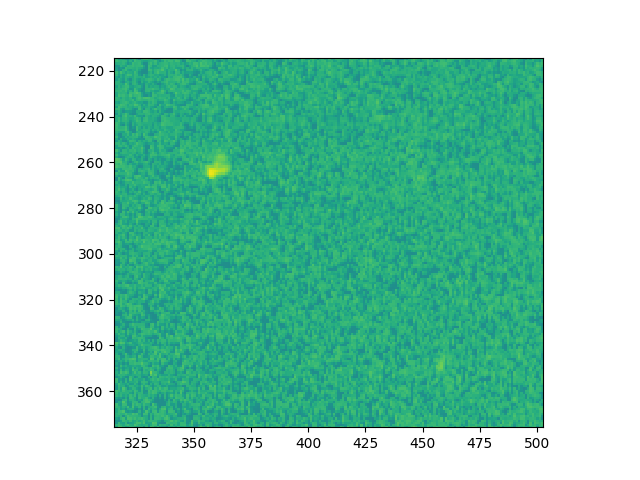

In [156]:
fig,ax = subplots()
ax.imshow(numpy.arcsinh(c))

<IPython.core.display.Javascript object>


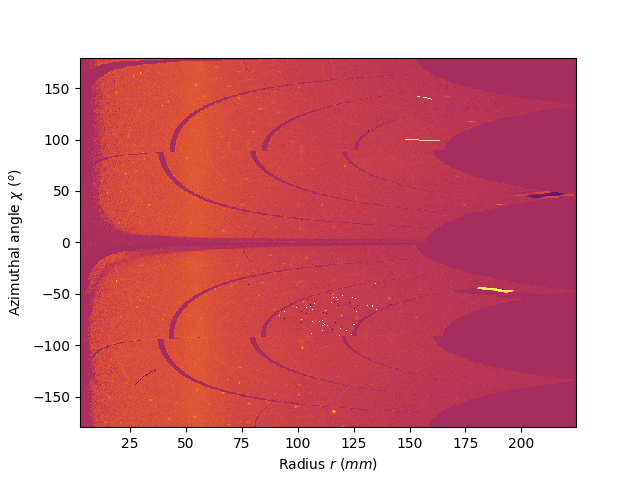

In [165]:
from pyFAI.gui import jupyter
jupyter.plot2d(ai.integrate2d(corrected_d.get(), 1024, 512, unit="r_mm",method="csr_nosplit_gpu"))

In [166]:
res = ai.sigma_clip(corrected_d.get(), 1024, 512, unit="r_mm",method="csr_nosplit_gpu")

<IPython.core.display.Javascript object>


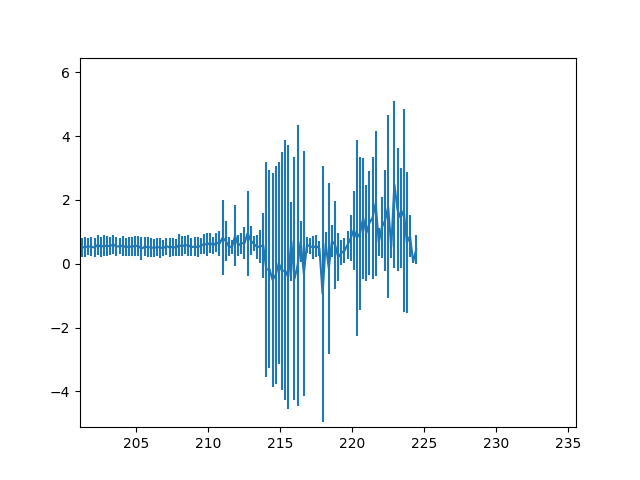

<ErrorbarContainer object of 3 artists>

In [168]:
fig,ax = subplots()
ax.errorbar(*res)


In [187]:
nsigma=10
minimum = ai.calcfrom1d(res[0], res[1]+nsigma*res[2], dim1_unit="r_mm")

In [188]:
valid = (corrected_d.get() - minimum)>0

/mntdirect/_scisoft/users/jupyter/jupy35/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


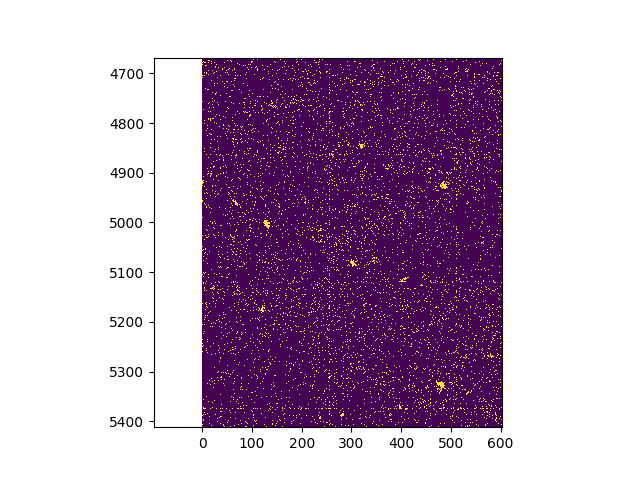

In [189]:
fig,ax = subplots()
ax.imshow(valid)

In [176]:
minimum

array([[0.69301322, 0.91166489, 1.1302718 , ..., 0.69464527, 0.69906047,
        0.70506871],
       [0.93140538, 1.15012651, 1.36880289, ..., 0.70640746, 0.71242387,
        0.71843481],
       [1.1697648 , 1.3885554 , 1.53872429, ..., 0.71976808, 0.7257872 ,
        0.73180084],
       ...,
       [0.73205165, 0.73201174, 0.73197179, ..., 0.24820807, 0.33206267,
        0.41591878],
       [0.73196356, 0.73192365, 0.73188372, ..., 0.33940589, 0.419186  ,
        0.41917236],
       [0.73187548, 0.73183559, 0.73009665, ..., 0.4191848 , 0.41917116,
        0.41915752]])

In [177]:
corrected_d.get()

array([[0.        , 0.        , 0.51782227, ..., 0.        , 0.01045561,
        4.2824707 ],
       [0.06653976, 0.        , 0.        , ..., 0.        , 0.        ,
        9.000977  ],
       [0.        , 8.813965  , 0.        , ..., 0.        , 0.        ,
        0.05374908],
       ...,
       [5.1589355 , 0.        , 0.        , ..., 7.778076  , 0.        ,
        0.        ],
       [6.9033203 , 0.41503906, 0.        , ..., 0.8022766 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.258255  , ..., 0.        , 0.27609253,
        0.10682297]], dtype=float32)

In [201]:
nb_bragg = []
nsigma = 6
for idx, frame in enumerate(raw):
    frame_d.set(frame)
    ocl_pedestal_cutoff(queue, (frame.size,), (1024,), 
                                frame_d.data,
                                gains_d.data,
                                pedestal_d.data,
                                error_d.data,
                                corrected_d.data,
                                numpy.uint32(frame.size),
                                numpy.uint32(nsigma))
    corrected = corrected_d.get()
    res = ai.sigma_clip(corrected, 1024, 512, unit="r_mm",method="csr_nosplit_gpu")
    minimum = ai.calcfrom1d(res[0], res[1]+nsigma*res[2], dim1_unit="r_mm")
    valid = numpy.nansum(corrected_d.get() - minimum)
    nb_bragg.append(valid)
    if idx%100==0: print(idx)

0
100
200
300
400


<IPython.core.display.Javascript object>


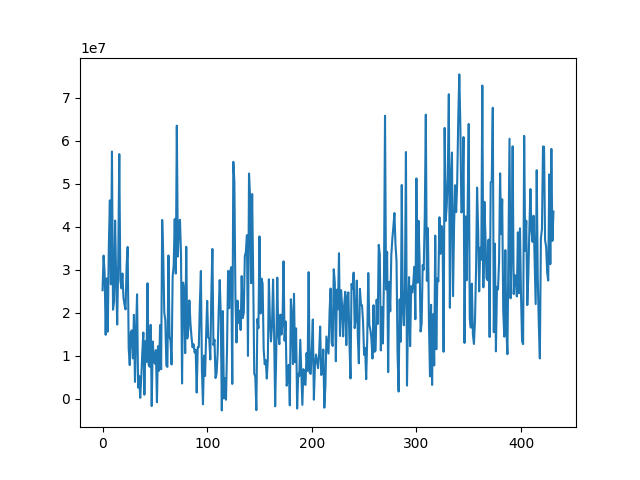

In [202]:
fig, ax = subplots()
ax.plot(nb_bragg)

In [192]:
valid

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [200]:
numpy.nansum(corrected_d.get() - minimum)

43469424.73380569

In [196]:
corrected_d.get().sum()

nan

65419930.5728332

In [203]:
pyFAI.version

'0.18.0'